In [1]:
import pandas as pd
import requests
import json

In [2]:
# request data from the API
url = 'https://api.eia.gov/category/?api_key='''KEY'''&category_id=371'
response = requests.get(url)
print(response.status_code)
data = response.json()
data.keys()

200


dict_keys(['request', 'category'])

### Database Info

The U.S. Energy Information Administration is committed to enhancing the value of its free and open data by making it available through an Application Programming Interface (API) and open data tools to better serve our customers. The data in the API is also available in bulk file, in Excel via the add-in, in Google Sheets via an add-on, and via widgets that embed interactive data vizualizations of EIA data on any website. By making EIA data available in machine-readable formats, the creativity in the private, the non-profit, and the public sectors can be harnessed to find new ways to innovate and create value-added services powered by public data.



Currently, EIA's API contains the following main data sets:

Hourly electricity operating data, including actual and forecast demand, net generation, and the power flowing between electric systems
408,000 electricity series organized into 29,000 categories
30,000 State Energy Data System series organized into 600 categories
115,052 petroleum series and associated categories
34,790 U.S. crude imports series and associated categories
11,989 natural gas series and associated categories
132,331 coal series and associated categories
3,872 Short-Term Energy Outlook series and associated categories
368,466 Annual Energy Outlook series and associated categories
92,836 International energy series

In [3]:
def epi_data():
    url = 'https://api.eia.gov/category/?api_key=9eVTCpuQVgMQDZnriiK5gt3uNzwJMzzf4dBzvE2s&category_id=371'
    result = requests.get(url)
    result.status_code
    result.json()
    return result.json()
epi_data()

{'request': {'category_id': 371, 'command': 'category'},
 'category': {'category_id': '371',
  'parent_category_id': None,
  'name': 'EIA Data Sets',
  'notes': '',
  'childcategories': [{'category_id': 0, 'name': 'Electricity'},
   {'category_id': 40203, 'name': 'State Energy Data System (SEDS)'},
   {'category_id': 714755, 'name': 'Petroleum'},
   {'category_id': 714804, 'name': 'Natural Gas'},
   {'category_id': 711224, 'name': 'Total Energy'},
   {'category_id': 717234, 'name': 'Coal'},
   {'category_id': 829714, 'name': 'Short-Term Energy Outlook'},
   {'category_id': 964164, 'name': 'Annual Energy Outlook'},
   {'category_id': 1292190, 'name': 'Crude Oil Imports'},
   {'category_id': 2123635, 'name': 'U.S. Electric System Operating Data'},
   {'category_id': 2134384, 'name': 'International Energy Data'},
   {'category_id': 2251604, 'name': 'CO2 Emissions'},
   {'category_id': 2631064, 'name': 'International Energy Outlook'},
   {'category_id': 2889994, 'name': 'U.S. Nuclear Outag

In [4]:
# create a function that calls returns api data by category_id
def epi_category(category_id):
    url = 'https://api.eia.gov/category/?api_key=9eVTCpuQVgMQDZnriiK5gt3uNzwJMzzf4dBzvE2s&category_id=' + category_id
    result = requests.get(url)
    result.status_code
    result.json()
    return result.json()
data = epi_category('711238')
data.keys()
    

dict_keys(['request', 'category'])

In [5]:
df_series = pd.DataFrame(data['category']['childseries'])
df_series
# select only the f rows that have 'A'
df_series[df_series['f'] == 'A']

,series_id,name,f,units,updated
0,TOTAL.FFPRBUS.A,"Total Fossil Fuels Production, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
2,TOTAL.FFTCBUS.A,"Total Fossil Fuels Consumption, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
4,TOTAL.NUETBUS.A,"Nuclear Electric Power Consumption/Production,...",A,Trillion Btu,24-MAR-22 03.37.10 PM
6,TOTAL.REPRBUS.A,"Total Renewable Energy Production, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
8,TOTAL.RETCBUS.A,"Total Renewable Energy Consumption, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
10,TOTAL.TEAJBUS.A,"Primary Energy Stock Change and Other, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
12,TOTAL.TEEXBUS.A,"Total Primary Energy Exports, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
14,TOTAL.TEIMBUS.A,"Total Primary Energy Imports, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
16,TOTAL.TENIBUS.A,"Total Primary Energy Net Imports, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM
18,TOTAL.TEPRBUS.A,"Total Primary Energy Production, Annual",A,Trillion Btu,24-MAR-22 03.37.10 PM


In [6]:
# create a list of the series_id's and names where the f is A
series_id = []
series_name = []
for i in range(len(df_series)):
    if df_series['f'][i] == 'M':
        series_id.append(df_series['series_id'][i])
        series_name.append(df_series['name'][i])
print(series_id)
print(series_name)

['TOTAL.FFPRBUS.M', 'TOTAL.FFTCBUS.M', 'TOTAL.NUETBUS.M', 'TOTAL.REPRBUS.M', 'TOTAL.RETCBUS.M', 'TOTAL.TEAJBUS.M', 'TOTAL.TEEXBUS.M', 'TOTAL.TEIMBUS.M', 'TOTAL.TENIBUS.M', 'TOTAL.TEPRBUS.M', 'TOTAL.TETCBUS.M']
['Total Fossil Fuels Production, Monthly', 'Total Fossil Fuels Consumption, Monthly', 'Nuclear Electric Power Consumption/Production, Monthly', 'Total Renewable Energy Production, Monthly', 'Total Renewable Energy Consumption, Monthly', 'Primary Energy Stock Change and Other, Monthly', 'Total Primary Energy Exports, Monthly', 'Total Primary Energy Imports, Monthly', 'Total Primary Energy Net Imports, Monthly', 'Total Primary Energy Production, Monthly', 'Total Primary Energy Consumption, Monthly']


In [7]:
def epi_series(category_id):
    """ Returns the name of the category with the given id."""
    url = 'https://api.eia.gov/series/?api_key=9eVTCpuQVgMQDZnriiK5gt3uNzwJMzzf4dBzvE2s&series_id=' + category_id
    result = requests.get(url)
    result.status_code
    result.json()
    return result.json()

In [8]:
# create a function that turns the data into a dataframe
def build_df(series_id):
    """ Returns a dataframe of the series with the given id."""
    data = epi_series(series_id)
    df = pd.DataFrame(data['series'])
    # seperate the 'data'
    df_dict = df['data'].to_dict()
    # convert to dataframe
    df_data = pd.DataFrame(df_dict)
    # convert to list
    df_data[0].tolist()
    # convert list to dataframe
    df = pd.DataFrame(df_data[0].tolist())
    df.columns = ['date', 'value']
    return df

In [9]:
# create a function that takes in a list of series_id and names and builds a dataframe from the data for each series_id properly naming the values
def build_df_list_rename(series_id_list, series_name_list):
    """ Returns a dataframe of the series with the given id."""
    df_list = []
    for series_id, series_name in zip(series_id_list, series_name_list):
        df = build_df(series_id)
        df.rename(columns={'value': series_name}, inplace=True)
        # join the dataframes using the date as the index
        df = df.set_index('date')
        df_list.append(df)
    return df_list

In [10]:
df_list = build_df_list_rename(series_id, series_name)


In [11]:
# convert df_list to a dataframe and join lists on the date
df_list = pd.concat(df_list, axis=1)

In [12]:
df_list.sort_index(inplace=True)
df_list

,"Total Fossil Fuels Production, Monthly","Total Fossil Fuels Consumption, Monthly","Nuclear Electric Power Consumption/Production, Monthly","Total Renewable Energy Production, Monthly","Total Renewable Energy Consumption, Monthly","Primary Energy Stock Change and Other, Monthly","Total Primary Energy Exports, Monthly","Total Primary Energy Imports, Monthly","Total Primary Energy Net Imports, Monthly","Total Primary Energy Production, Monthly","Total Primary Energy Consumption, Monthly"
date,,,,,,,,,,,
197301,4932.632,6747.651,68.103,403.981,403.981,771.858,125.781,1173.080,1047.299,5404.715,7223.873
197302,4729.582,6163.095,64.634,360.900,360.900,390.129,120.883,1168.005,1047.122,5155.115,6592.366
197303,4946.902,6044.647,72.494,400.161,400.161,-67.640,139.950,1309.473,1169.523,5419.556,6521.439
197304,4716.271,5493.184,64.070,380.470,380.470,-110.067,194.185,1085.169,890.984,5160.812,5941.729
197305,4956.995,5613.551,62.111,392.141,392.141,-305.335,196.775,1162.804,966.029,5411.246,6071.940
...,...,...,...,...,...,...,...,...,...,...,...
202108,6627.111,6746.391,725.698,1008.059,1001.833,481.333,2201.484,1844.726,-356.758,8360.867,8485.442
202109,6355.365,6062.810,673.595,970.036,960.758,-188.842,1931.406,1827.781,-103.625,7998.996,7706.530
202110,6722.335,6072.363,594.842,1010.785,1001.577,-267.817,2130.359,1748.724,-381.635,8327.963,7678.511


In [22]:
# set index to datetime format YYYY-MM
df_list.index = pd.to_datetime(df_list.index, format='%Y%m')


In [23]:
# change all columns to lowercase and replace spaces with underscores and remove special characters
df_list.columns = df_list.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '').str.replace('.', '').str.replace('-', '').str.replace(',','')


/var/folders/00/hwmfmnz96wxfytp1bbw2qlym0000gn/T/ipykernel_34151/4242536318.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_list.columns = df_list.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '').str.replace('.', '').str.replace('-', '').str.replace(',','')


In [ ]:
# create a function that prepares the data
def prepare_data(df_list):
    df_list.index = pd.to_datetime(df_list.index, format='%Y%m')
    df_list.columns = df_list.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '').str.replace('.', '').str.replace('-', '').str.replace(',','')
    return df_list


In [24]:
df_list

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,nuclear_electric_power_consumptionproduction_monthly,total_renewable_energy_production_monthly,total_renewable_energy_consumption_monthly,primary_energy_stock_change_and_other_monthly,total_primary_energy_exports_monthly,total_primary_energy_imports_monthly,total_primary_energy_net_imports_monthly,total_primary_energy_production_monthly,total_primary_energy_consumption_monthly
date,,,,,,,,,,,
1973-01-01,4932.632,6747.651,68.103,403.981,403.981,771.858,125.781,1173.080,1047.299,5404.715,7223.873
1973-02-01,4729.582,6163.095,64.634,360.900,360.900,390.129,120.883,1168.005,1047.122,5155.115,6592.366
1973-03-01,4946.902,6044.647,72.494,400.161,400.161,-67.640,139.950,1309.473,1169.523,5419.556,6521.439
1973-04-01,4716.271,5493.184,64.070,380.470,380.470,-110.067,194.185,1085.169,890.984,5160.812,5941.729
1973-05-01,4956.995,5613.551,62.111,392.141,392.141,-305.335,196.775,1162.804,966.029,5411.246,6071.940
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,6627.111,6746.391,725.698,1008.059,1001.833,481.333,2201.484,1844.726,-356.758,8360.867,8485.442
2021-09-01,6355.365,6062.810,673.595,970.036,960.758,-188.842,1931.406,1827.781,-103.625,7998.996,7706.530
2021-10-01,6722.335,6072.363,594.842,1010.785,1001.577,-267.817,2130.359,1748.724,-381.635,8327.963,7678.511


(10957.0, 18262.0)

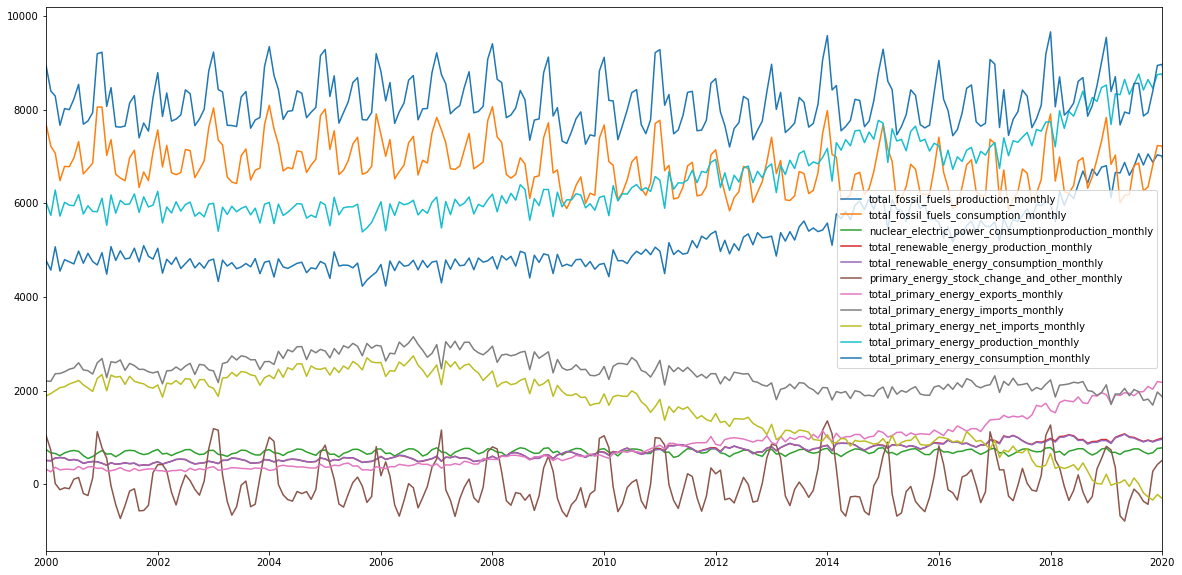

In [44]:
# increase figure size and plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df_list)
# legend
plt.legend(df_list.columns)
# xlim
plt.xlim(pd.to_datetime('2000'), pd.to_datetime('2020'))

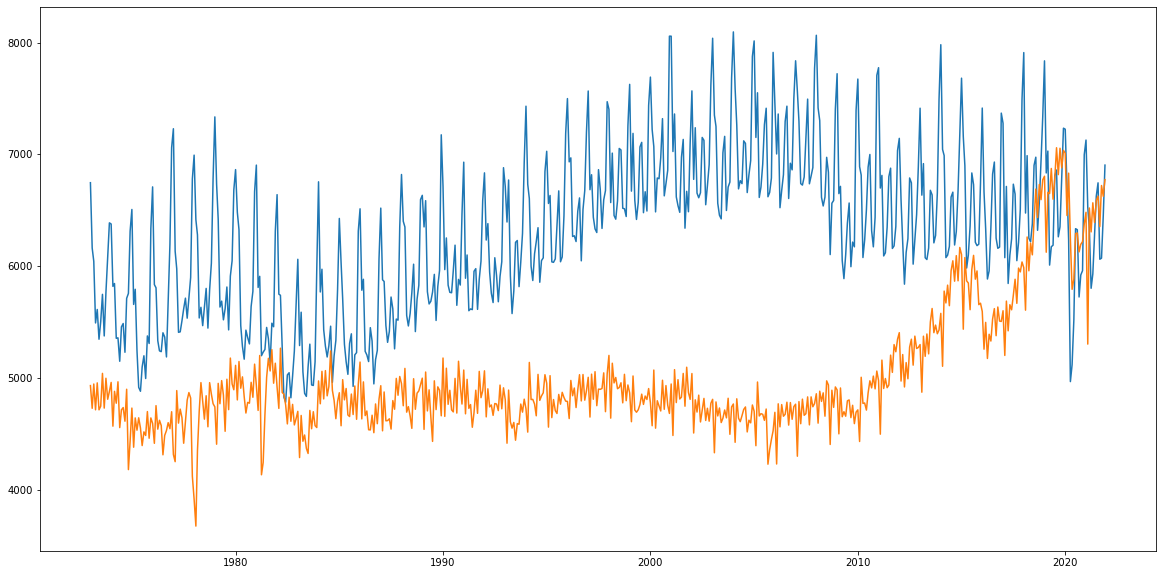

In [61]:
# plot only the columns that have the word consumption
plt.figure(figsize=(20,10))
# total_fossil_fuels_consumption_monthly
plt.plot(df_list['total_fossil_fuels_consumption_monthly'])
plt.plot(df_list['total_fossil_fuels_production_monthly'])
